In [1]:
#automatically plot any two variables within certain limits
    # for example, compare run time to 

In [2]:
%matplotlib ipympl
import ipywidgets, asyncio, time
import glob
import pandas as pd
# from datetime import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.style as mplstyle
mpl.rcParams['path.simplify_threshold'] = 1.0
mplstyle.use('fast')


dfPulseFiles =pd.DataFrame(columns =  ["type", "date", "time","df_runtime", "pulse_duration", "starting_sample_temp", "starting_ewm", "peak", "air_setpoint", "propane_setpoint"])
dfFlushFiles =pd.DataFrame(columns =  ["type", "date", "time","df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint"])

def addFileToDF(fileName):
    fileName = fileName.replace('C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ ','',1)
    fileName = fileName.replace('.pkl','',1)    
    items = fileName.split(' ')
    data = []
    for item in items:
        try:
            data.append(float(item))
        except ValueError:
            data.append(item)
        
    if data[0] == "Pulse":
        global dfPulseFiles
        dfPulseFiles = pd.concat([dfPulseFiles, pd.DataFrame([data], columns = ["type", "date", "time","df_runtime", "pulse_duration", "starting_sample_temp", "starting_ewm", "peak", "air_setpoint", "propane_setpoint"]) ],ignore_index=True)
    elif data[0] == "Flush":
        global dfFlushFiles
        dfFlushFiles = pd.concat([dfFlushFiles, pd.DataFrame([data], columns = ["type", "date", "time","df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint"]) ],ignore_index=True)
        
def pulseToFilePath(series):
    return f'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ {series["type"]} {series["date"]} {series["time"]} {str(series["df_runtime"])} {str(series["pulse_duration"])} {str(series["starting_sample_temp"])} {str(series["starting_ewm"])} {str(series["peak"])} {str(series["air_setpoint"])} {str(series["propane_setpoint"])}.pkl'

def flushToFilePath(series):
    return f'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ {series["type"]} {series["date"]} {series["time"]} {str(series["df_runtime"])} {str(series["flush_duration"])} {str(series["starting_sample_temp"])} {str(series["starting_ewm"])} {str(series["low"])} {str(series["air_setpoint"])} {str(series["propane_setpoint"])}.pkl'

def getDF(filePath):
    return pd.read_pickle(filePath)

files = glob.glob("C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\*.pkl")
for file in files:
     addFileToDF(file)
# dfFiles
#{dt_string} {df_runtime} {pulse_duration} {starting_sample_temp} {starting_ewm} {peak} {air_setpoint} {propane_setpoint}

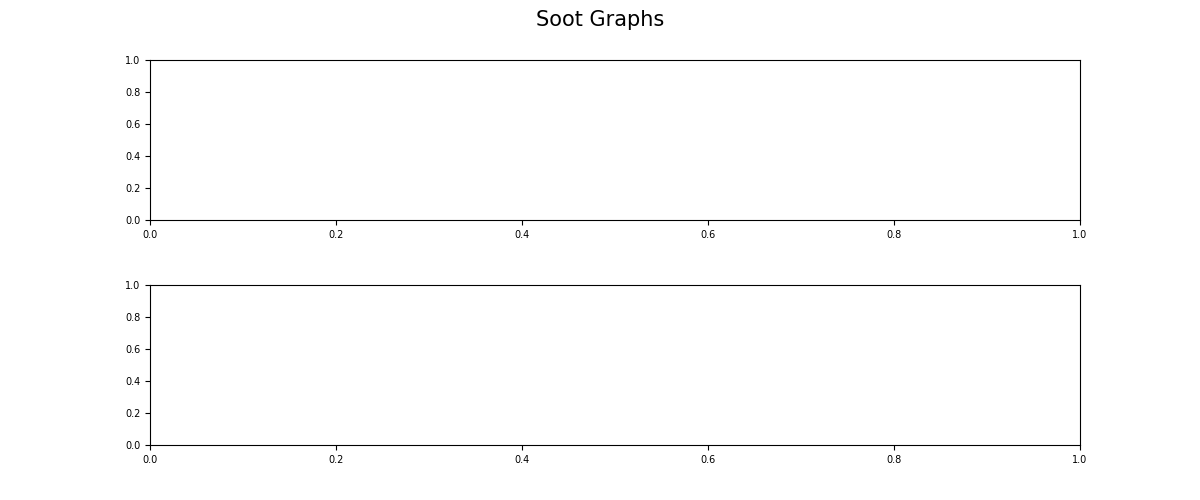

In [25]:
itemLayout = ipywidgets.Layout(height = "auto",width="13.7%")
numberStyle = {'description_width': "50%"}

def colLayout(wid):
    return ipywidgets.Layout(display = "flex",flex_flow='column',border = '0px solid black',align_items = "stretch",justify_content="flex-start",width = wid)

def rowLayout(h):
    return ipywidgets.Layout(display = "flex",flex_flow='row',border = '1px solid black',align_items = "stretch",justify_content="flex-start",height = h,width = "70%")

running = ipywidgets.ToggleButton(description="Get DataFrames", icon="play",button_style = 'danger', layout = itemLayout)
text = ipywidgets.Textarea( layout = itemLayout, value = "status: ")
dataType = ipywidgets.ToggleButtons(options = ['Pulse','Flush'], layout =itemLayout, description = "date type: ")
xlim = ipywidgets.IntSlider(description="xlim", value=200, min=10, max=1000)
setx = ipywidgets.IntSlider(description="move x", value=0, min=0, max=1000)
slids = ipywidgets.VBox(children = [setx,xlim],layout = {"width":"30%"})

next1 = ipywidgets.Button(description="Next Plot 1", icon="play",layout = {"width":"93%"})
next2 = ipywidgets.Button(description="Next Plot 2", icon="play",layout = {"width":"93%"})
nextButtons = ipywidgets.VBox(children = [next1,next2],layout = colLayout("10%"))
back1 = ipywidgets.Button(description="Back 1", icon="play",layout = {"width":"93%"})
back2 = ipywidgets.Button(description="Back 2", icon="play",layout = {"width":"93%"})
backButtons = ipywidgets.VBox(children = [back1,back2],layout = colLayout("10%"))

maxPulse = ipywidgets.FloatText(description = "pulse time max",value = 5,step = 0.05, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minPulse = ipywidgets.FloatText(description = "pulse time min",value = 0.5,step = 0.05, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
pulseDuration = ipywidgets.HBox(children = [minPulse,maxPulse],description = "pulse duration",layout = colLayout("auto"))

maxFlush = ipywidgets.FloatText(description = "flush time max",value = 1000, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minFlush = ipywidgets.FloatText(description = "flush time min",value = 5, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
flushDuration =  ipywidgets.HBox(children = [minFlush,maxFlush],description = "flush duration",layout = colLayout("auto"))

#"df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint"])
maxTime = ipywidgets.FloatText(description = "run time max",value = 5000, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minTime = ipywidgets.FloatText(description = "run time min",value = 0, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
runTime =  ipywidgets.HBox(children = [minTime,maxTime],description = "run time",layout = colLayout("auto"))

maxTemp = ipywidgets.FloatText(description = "sample temp max",value = 35, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minTemp = ipywidgets.FloatText(description = "sample temp min",value = 25, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
temp =  ipywidgets.HBox(children = [minTemp,maxTemp],description = "flush duration",layout = colLayout("auto"))

maxStartEwm = ipywidgets.FloatText(description = "starting bcc max",value = 100000, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minStartEwm = ipywidgets.FloatText(description = "starting bcc min",value = 0, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
startEwm =  ipywidgets.HBox(children = [minStartEwm,maxStartEwm],description = "flush duration",layout = colLayout("auto"))

maxAirSetpoint = ipywidgets.FloatText(description = "air max",value = 12, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minAirSetpoint = ipywidgets.FloatText(description = "air min",value = 0, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
airSetpoint =  ipywidgets.HBox(children = [minAirSetpoint,maxAirSetpoint],description = "flush duration",layout = colLayout("auto"))

maxPropaneSetpoint = ipywidgets.FloatText(description = "propane max",value = 0.1, step = 0.01,layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
minPropaneSetpoint = ipywidgets.FloatText(description = "propane min",value = 0.00, step = 0.01, layout = ipywidgets.Layout(height = "auto",width="90%"),style = numberStyle)
propaneSetpoint =  ipywidgets.HBox(children = [minPropaneSetpoint,maxPropaneSetpoint],description = "flush duration",layout = colLayout("auto"))

duration1 = ipywidgets.FloatText(layout = itemLayout,style = numberStyle)
endBcc1 = ipywidgets.FloatText(description = "end bcc", layout = itemLayout,style = numberStyle)
runTime1 = ipywidgets.FloatText(description = "run time", layout = itemLayout,style = numberStyle)
sampleTemp1 = ipywidgets.FloatText(description = "sample temp", layout = itemLayout,style = numberStyle)
startBcc1 = ipywidgets.FloatText(description = "starting bcc",layout = itemLayout,style = numberStyle)
airSetpoint1 = ipywidgets.FloatText(description = "air setpoint", layout = itemLayout,style = numberStyle)
propaneSetpoint1 = ipywidgets.FloatText(description = "propane setpoint", layout = itemLayout,style = numberStyle)

duration2 = ipywidgets.FloatText(layout = itemLayout,style = numberStyle)
endBcc2 = ipywidgets.FloatText(description = "end bcc", layout = itemLayout,style = numberStyle)
runTime2 = ipywidgets.FloatText(description = "run time", layout = itemLayout,style = numberStyle)
sampleTemp2 = ipywidgets.FloatText(description = "sample temp", layout = itemLayout,style = numberStyle)
startBcc2 = ipywidgets.FloatText(description = "starting bcc",layout = itemLayout,style = numberStyle)
airSetpoint2 = ipywidgets.FloatText(description = "air setpoint", layout = itemLayout,style = numberStyle)
propaneSetpoint2 = ipywidgets.FloatText(description = "propane setpoint", layout = itemLayout,style = numberStyle)

showBcc = ipywidgets.Checkbox(value = False, description = "Show Bcc", layout = itemLayout,indent = False)
showEWM = ipywidgets.Checkbox(value = True, description = "Show EWM", layout = itemLayout,indent = False)
showMax = ipywidgets.Checkbox(value = True, description = "Show max", layout = itemLayout,indent = False)
showMin = ipywidgets.Checkbox(value = True, description = "Show min", layout = itemLayout,indent = False)

misc = ipywidgets.HBox(children = [running,nextButtons,backButtons,text,dataType,slids], layout = rowLayout("10%"))
filters = ipywidgets.HBox(children=[pulseDuration,flushDuration,runTime,temp,startEwm,airSetpoint,propaneSetpoint],layout = rowLayout("10%"))
values1 =  ipywidgets.HBox(children=[duration1,endBcc1,runTime1,sampleTemp1,startBcc1,airSetpoint1,propaneSetpoint1],layout = rowLayout("10%"))
values2 =  ipywidgets.HBox(children=[duration2,endBcc2,runTime2,sampleTemp2,startBcc2,airSetpoint2,propaneSetpoint2],layout = rowLayout("10%"))
checks =  ipywidgets.HBox(children=[showBcc,showEWM,showMax,showMin],layout = rowLayout("10%"))
ui = ipywidgets.VBox(children = [misc,filters,values1,values2,checks],layout = colLayout("100%"))

tasks = dict()

paths = []
plotNum1 = 0
plotNum2 = 1

def changeNext1(x):
    global plotNum1
    plotNum1 = plotNum1 + 1
    
def changeNext2(x):
    global plotNum2
    plotNum2 = plotNum2 + 1
    
def changeBack1(x):
    global plotNum1
    plotNum1 = plotNum1 - 1
    
def changeBack2(x):
    global plotNum2
    plotNum2 = plotNum2 - 1

async def find_data(t):
    text.value = ("status: filtering data")
    #files.
        #do things
    if dataType.value == "Pulse":
        dfMatchingFiles = dfPulseFiles.loc[
            (dfPulseFiles["pulse_duration"] >= minPulse.value) & (dfPulseFiles["pulse_duration"] <= maxPulse.value) &
            (dfPulseFiles["df_runtime"] <= maxTime.value) & (dfPulseFiles["df_runtime"] >= minTime.value) &
            (dfPulseFiles["starting_sample_temp"] <= maxTemp.value) &(dfPulseFiles["starting_sample_temp"] >= minTemp.value) &
            (dfPulseFiles["starting_ewm"] <= maxStartEwm.value) & (dfPulseFiles["starting_ewm"] >= minStartEwm.value) &
            (dfPulseFiles["air_setpoint"] <= maxAirSetpoint.value) & (dfPulseFiles["air_setpoint"] >= minAirSetpoint.value) &
            (dfPulseFiles["propane_setpoint"] <= maxPropaneSetpoint.value) & (dfPulseFiles["propane_setpoint"] >= minPropaneSetpoint.value)
        ]
        for index,row in dfMatchingFiles.iterrows():
            paths.append(pulseToFilePath(row))
            
    elif dataType.value == "Flush":
        #["type", "date", "time","df_runtime", "flush_duration", "starting_sample_temp", "starting_ewm", "low", "air_setpoint", "propane_setpoint"]
        dfMatchingFiles = dfFlushFiles.loc[
            (dfFlushFiles["flush_duration"] >= minFlush.value) & (dfFlushFiles["flush_duration"] <= maxFlush.value) &
            (dfFlushFiles["df_runtime"] <= maxTime.value) & (dfFlushFiles["df_runtime"] >= minTime.value) &
            (dfFlushFiles["starting_sample_temp"] <= maxTemp.value) &(dfFlushFiles["starting_sample_temp"] >= minTemp.value) &
            (dfFlushFiles["starting_ewm"] <= maxStartEwm.value) & (dfFlushFiles["starting_ewm"] >= minStartEwm.value) &
            (dfFlushFiles["air_setpoint"] <= maxAirSetpoint.value) & (dfFlushFiles["air_setpoint"] >= minAirSetpoint.value) &
            (dfFlushFiles["propane_setpoint"] <= maxPropaneSetpoint.value) & (dfFlushFiles["propane_setpoint"] >= minPropaneSetpoint.value)
        ]
        for index,row in dfMatchingFiles.iterrows():
            paths.append(flushToFilePath(row))
            
async def graph(t,a,b):    
    if a >= len(paths):
        global plotNum1
        plotNum1 = plotNum1 - len(paths)
    
    if b >= len(paths):
        global plotNum2
        plotNum2 = plotNum2 - len(paths)
    
    try:
        df1 = getDF(paths[plotNum1])
        df2 = getDF(paths[plotNum2])
        text.value = f"{str(len(paths))} dataframes fit the filter"
    except IndexError:
        text.value = "no data frames fit the profile"
    
    #update plots
    ax1.clear()
    ax2.clear()
    ax1.set_xlim([df1.shape[0] - (xlim.value+setx.value),df1.shape[0]-setx.value])
    ax2.set_xlim([df2.shape[0] - (xlim.value+setx.value),df2.shape[0]-setx.value])
    ax1.grid()
    ax2.grid()
    
    ax1.set_title(f"plot {plotNum1}",loc='left')
    ax2.set_title(f"plot {plotNum2}",loc='left')
    if showBcc.value: 
        ax1.plot(df1["ir bcc"], label = "IR BCC", color = "black")
        ax2.plot(df2["ir bcc"], label = "IR BCC", color = "black")
        showMax.value = False
        showMin.value = False
    if showEWM.value: 
        ax1.plot(df1["bcc ewm"], label = "Bcc EWM", color = "blue")
        ax2.plot(df2["bcc ewm"], label = "Bcc EWM", color = "blue")
    if showMax.value:
        indexMax1 = df1['bcc ewm'].idxmax()
        Max1 = round(df1['bcc ewm'].max(),2)
        indexMax2 = df2['bcc ewm'].idxmax()
        Max2 = round(df2['bcc ewm'].max(),2)
        ax1.annotate(f'Max: {Max1}',xy = (indexMax1,Max1), xytext = (indexMax1*0.95,Max1*1.3), arrowprops = dict(facecolor = 'green',shrink = 0.05),)
        ax2.annotate(f'Max: {Max2}',xy = (indexMax2,Max2), xytext = (indexMax2*0.95,Max2*1.3), arrowprops = dict(facecolor = 'green',shrink = 0.05),)
    if showMin.value:
        indexMin1 = df1['bcc ewm'].idxmin()
        Min1 = round(df1['bcc ewm'].min(),2)
        indexMin2 = df2['bcc ewm'].idxmin()
        Min2 = round(df2['bcc ewm'].min(),2)
        ax1.annotate(f'Min: {Min1}',xy = (indexMin1,Min1), xytext = (indexMin1*0.95,Min1 - Max1*0.65), arrowprops = dict(facecolor = 'red',shrink = 0.05),)
        ax2.annotate(f'Min: {Min2}',xy = (indexMin2,Min2), xytext = (indexMin2*0.95,Min2 - Max2*0.65), arrowprops = dict(facecolor = 'red',shrink = 0.05),)

    ax1.legend(loc="upper left")
    ax2.legend(loc="upper left")
    fig.canvas.draw()
    fig.canvas.flush_events()
    
    #update values
    #[,runTime1,sampleTemp1,]
    
    
    duration1.description = paths[0].split(' ')[4] + " duration"
    duration2.description = paths[0].split(' ')[4] + " duration"
    duration1.value = float(paths[plotNum1].split(' ')[8])
    duration2.value = float(paths[plotNum2].split(' ')[8])
    startBcc1.value = float(paths[plotNum1].split(' ')[10])
    startBcc2.value = float(paths[plotNum2].split(' ')[10])
    endBcc1.value = df1.at[df1.shape[0]-1,"bcc ewm"]
    endBcc2.value = df2.at[df2.shape[0]-1,"bcc ewm"]
    runTime1.value = float(paths[plotNum1].split(' ')[7])
    runTime2.value = float(paths[plotNum2].split(' ')[7])
    sampleTemp1.value = float(paths[plotNum1].split(' ')[9])
    sampleTemp2.value = float(paths[plotNum2].split(' ')[9])
    propaneSetpoint1.value = float(paths[plotNum1].split(' ')[13].replace('.pkl','',1))
    propaneSetpoint2.value = float(paths[plotNum2].split(' ')[13].replace('.pkl','',1))
    airSetpoint1.value = float(paths[plotNum1].split(' ')[12])
    airSetpoint2.value = float(paths[plotNum2].split(' ')[12])
    
async def do_loop():
    t = 0
    paths.clear()
    asyncio.get_event_loop().create_task(find_data(t))
    while running.value:  
        asyncio.get_event_loop().create_task(graph(t,plotNum1,plotNum2))
        t += 1
        await asyncio.sleep(0.5)

def on_running_changed(*change):
    task = tasks.pop("do_loop", None)
    text.value = f"maybe stopping {task}..."
   
    if task:
        text.value = f"status: stopping {task}..."
        task.cancel()

    if running.value:
        text.value = "status: starting..."
        tasks["do_loop"] = asyncio.get_event_loop().create_task(do_loop())

        
#customize plot font sizes
plt.rc('axes',titlesize=10)
plt.rc('xtick',labelsize=7)
plt.rc('ytick',labelsize=7)
plt.rc('legend',fontsize = 8)
plt.rc('figure',titlesize = 15)
plt.rcParams['lines.linewidth'] = 1

#create "mosaic" customizing grid layout. Semicolons separate rows
fig,(ax1,ax2) = plt.subplots(2)
fig.set_size_inches(12,5)
fig.suptitle("Soot Graphs")
plt.subplots_adjust(hspace = 0.4)
plt.ion()
fig.canvas.draw()

next1.on_click(changeNext1)
next2.on_click(changeNext2)
back1.on_click(changeBack1)
back2.on_click(changeBack2)
running.observe(on_running_changed, "value")
ui

In [4]:
paths = []
dfMatchingFiles = dfFlushFiles.loc[(dfFlushFiles["flush_duration"] >= minFlush.value) & (dfFlushFiles["flush_duration"] <= maxFlush.value)]
for index,row in dfMatchingFiles.iterrows():
    paths.append(flushToFilePath(row))
print(dfMatchingFiles)
paths

    type        date      time  df_runtime  flush_duration  \
0  Flush  29-06-2022  11-18-14      510.58          435.91   
1  Flush  29-06-2022  11-27-41     1077.71          567.13   
2  Flush  29-06-2022  11-50-08      895.57          858.75   
5  Flush  29-06-2022  12-49-13     4440.96          562.26   
8  Flush  29-06-2022  15-38-16      871.44          536.95   

   starting_sample_temp  starting_ewm         low  air_setpoint  \
0                 28.42       -127.31 -1920.19846           0.0   
1                 28.57      -1232.95 -2280.38596           0.0   
2                 28.82      -2155.13 -2286.67484           0.0   
5                 29.16        670.66 -2661.06103           0.0   
8                 29.96       2766.16 -2992.71880           0.0   

   propane_setpoint  
0               0.0  
1               0.0  
2               0.0  
5               0.0  
8               0.0  


['C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 29-06-2022 11-18-14 510.58 435.91 28.42 -127.31 -1920.19846 0.0 0.0.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 29-06-2022 11-27-41 1077.71 567.13 28.57 -1232.95 -2280.38596 0.0 0.0.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 29-06-2022 11-50-08 895.57 858.75 28.82 -2155.13 -2286.67484 0.0 0.0.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 29-06-2022 12-49-13 4440.96 562.26 29.16 670.66 -2661.06103 0.0 0.0.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 29-06-2022 15-38-16 871.44 536.95 29.96 2766.16 -2992.7188 0.0 0.0.pkl']

In [5]:
dfFlushFiles

,type,date,time,df_runtime,flush_duration,starting_sample_temp,starting_ewm,low,air_setpoint,propane_setpoint
0,Flush,29-06-2022,11-18-14,510.58,435.91,28.42,-127.31,-1920.19846,0.00,0.0
1,Flush,29-06-2022,11-27-41,1077.71,567.13,28.57,-1232.95,-2280.38596,0.00,0.0
2,Flush,29-06-2022,11-50-08,895.57,858.75,28.82,-2155.13,-2286.67484,0.00,0.0
3,Flush,29-06-2022,12-19-56,2683.52,1787.94,28.97,-1388.55,-2468.59306,0.00,0.0
4,Flush,29-06-2022,12-39-51,3878.70,1116.23,29.13,291.85,-2921.96125,0.00,0.0
5,Flush,29-06-2022,12-49-13,4440.96,562.26,29.16,670.66,-2661.06103,0.00,0.0
6,Flush,29-06-2022,13-56-21,8468.38,4027.41,29.53,-488.06,-4896.80410,0.01,0.0
7,Flush,29-06-2022,14-18-19,9786.63,1318.24,29.66,-687.27,-3380.26470,0.01,0.0
8,Flush,29-06-2022,15-38-16,871.44,536.95,29.96,2766.16,-2992.71880,0.00,0.0


In [6]:
x = 123.3232
print(int(x))

123


In [7]:
dfMatchingFiles = dfFlushFiles.loc[dfFlushFiles["flush_duration"] > 400]
#print(dfMatchingFiles.head)
for index,row in dfMatchingFiles.iterrows():
    path = flushToFilePath(row)
    print(path)
    #     text.value = path

C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 29-06-2022 11-18-14 510.58 435.91 28.42 -127.31 -1920.19846 0.0 0.0.pkl
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 29-06-2022 11-27-41 1077.71 567.13 28.57 -1232.95 -2280.38596 0.0 0.0.pkl
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 29-06-2022 11-50-08 895.57 858.75 28.82 -2155.13 -2286.67484 0.0 0.0.pkl
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 29-06-2022 12-19-56 2683.52 1787.94 28.97 -1388.55 -2468.59306 0.0 0.0.pkl
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 29-06-2022 12-39-51 3878.7 1116.23 29.13 291.85 -2921.96125 0.0 0.0.pkl
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 29-06-2022 12-49-13 4440.96 562.26 29.16 670.66 -2661.06103 0.0 0.0.pkl
C:\Users\Kyan Shlipak\Documents\Solenoid Pulse DataFrames\ Flush 29-06-2022 13-56-21 8468.38 4027.41 29.53 -488.06 -4896.8041 0.01 0.0.pkl
C:\Users\Kyan Shlipak\Documents\S

In [8]:
paths

['C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 29-06-2022 11-18-14 510.58 435.91 28.42 -127.31 -1920.19846 0.0 0.0.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 29-06-2022 11-27-41 1077.71 567.13 28.57 -1232.95 -2280.38596 0.0 0.0.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 29-06-2022 11-50-08 895.57 858.75 28.82 -2155.13 -2286.67484 0.0 0.0.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 29-06-2022 12-49-13 4440.96 562.26 29.16 670.66 -2661.06103 0.0 0.0.pkl',
 'C:\\Users\\Kyan Shlipak\\Documents\\Solenoid Pulse DataFrames\\ Flush 29-06-2022 15-38-16 871.44 536.95 29.96 2766.16 -2992.7188 0.0 0.0.pkl']